In [67]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
import seaborn as sns

import matplotlib.pyplot as plt

# k-nearest neighbors

This dataset was obtained from https://archive.ics.uci.edu/ml/datasets/Heart+Disease (this is a great resource for datasets to try machine learning on). It has data on patients that are and are not diagnosed with heart disease.

The attributes are:
* age: age in years 
* sex: sex (1 = male; 0 = female) 
* cp: chest pain type 
 * -- Value 1: typical angina 
 * -- Value 2: atypical angina 
 * -- Value 3: non-anginal pain 
 * -- Value 4: asymptomatic 
* trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
* chol: serum cholestoral in mg/dl 
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg: resting electrocardiographic results 
 * -- Value 0: normal 
 * -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
 * -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
* thalach: maximum heart rate achieved 
* exang: exercise induced angina (1 = yes; 0 = no) 
* oldpeak = ST depression induced by exercise relative to rest 
* slope: the slope of the peak exercise ST segment 
 * -- Value 1: upsloping 
 * -- Value 2: flat 
 * -- Value 3: downsloping 
* ca: number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* num: diagnosis of heart disease (angiographic disease status) 
 * -- Value 0: absence.
 * -- Value 1,2,3,4: presence of heart disease


# Explore the data

Read in the data, modify the dependent variable name and plot a histogram of the ages of patients, both healthy and those with heart disease.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


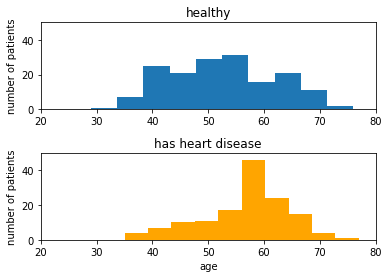

In [2]:
# Comma-separated values
df = pd.read_csv('cleveland.csv')

# Rename 'num' column to 'disease' and change 1,2,3,4 to 1
df = df.rename({'num':'disease'}, axis=1)
df['disease'] = df.disease.apply(lambda x: min(x, 1))
display(df.head(5))

# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.disease == 0].age);
# ax1.set_xlabel('age');
ax1.set_ylabel('number of patients');
ax1.set_xlim(20, 80);
ax1.set_ylim(0, 50);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].age, color='orange');
ax2.set_xlabel('age');
ax2.set_ylabel('number of patients');
ax2.set_xlim(20, 80);
ax2.set_ylim(0, 50);
ax2.set_title('has heart disease');


In [3]:
len(df)

303

# k-nearest neighbors - first try

Try it first on age, using the scikit-learn package. This code simply looks for the five patients with ages closest to a given age, then prints how many of those patients are healthy and how many have heart disease.

In [4]:
# Use knn on age. First create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=9, metric='euclidean', algorithm='auto')

# Create a two-dimensional array. This is basically a one-dimensional array with
# single-element arrays of patient ages in the second dimension. We're going to
# search for neighbors using only the age dimension.
X = [[x] for x in df.age]

# This builds an index data structure under the hood for query performance
fit = nn.fit(X)

# Find the k nearest neighbors
distances, indices = fit.kneighbors([[70]])
display(indices[0])

# Get the patients that are near the age
nbrs = df.iloc[indices[0]]
display(nbrs)

# Print how many patients are sick and how many are healthy
healthy = nbrs[nbrs.disease == 0].count().disease
sick = nbrs[nbrs.disease == 1].count().disease
print('healthy: {}\nsick: {}'.format(healthy, sick))


array([136, 155, 170, 258, 273, 103, 196, 189,  30])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
136,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,1
155,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
170,70.0,1.0,3.0,160.0,269.0,0.0,0.0,112.0,1.0,2.9,2.0,1.0,7.0,1
258,70.0,1.0,2.0,156.0,245.0,0.0,2.0,143.0,0.0,0.0,1.0,0.0,3.0,0
273,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0,0
103,71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,0
196,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0,0
189,69.0,1.0,3.0,140.0,254.0,0.0,2.0,146.0,0.0,2.0,2.0,3.0,7.0,1
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0


healthy: 5
sick: 4


# multiple dimensions

Now run knn on a patient from the database using an additional dimension, or attribute: trestbps (resting blood pressure).

In [5]:
# df[['age', 'trestbps']].values
X = df[['age', 'trestbps']].values
y = df[['disease']].values

# This builds an index data structure under the hood for query performance
fit = nn.fit(X)

# Get a random patient to test on
i = random.randint(0,len(X)-1)
patientX = X[i]
patienty = y[i]
display(df.iloc[i])

# Find the k nearest neighbors to the patient. Problem: the patient
# itself will be found in the list of neighbors!
distances, indices = fit.kneighbors([patientX])
nbrs = df.iloc[indices[0]]
# display(nbrs)

healthy = nbrs[nbrs.disease == 0].count().disease
sick = nbrs[nbrs.disease == 1].count().disease
print('healthy: {}\nsick: {}'.format(healthy, sick))
predict = 0 if (healthy > sick) else 1
actual = 0 if (patienty == 0) else 1
success = predict == actual
print(success)

age          64
sex           1
cp            4
trestbps    128
chol        263
fbs           0
restecg       0
thalach     105
exang         1
oldpeak     0.2
slope         2
ca          1.0
thal        7.0
disease       0
Name: 252, dtype: object

healthy: 4
sick: 5
False


# multiple tests

In [6]:
X = df[['age', 'trestbps']].values
y = df[['disease']].values

# This builds an index data structure under the hood for query performance
fit = nn.fit(X)

# Get random patients to test on
n = 7
pindices = [random.randint(0,len(X)-1) for _ in range(n)]
patientsX = X[pindices]
patientsy = y[pindices]

# Find the k nearest neighbors to the patient. Problem: we still
# have the problem of the patient itself being found!
distances, indices = fit.kneighbors(patientsX)
print('indices of k-nearest neighbors for each patient:')
display(indices)

for i in range(n):
    print('nearest neighbors to patient: {}:'.format(patientsX[i]))
    nbrs = df.iloc[indices[i]]
    display(nbrs)

# This is where we would compile how many patients are predicted
# correctly.

healthy = nbrs[nbrs.disease == 0].count().disease
sick = nbrs[nbrs.disease == 1].count().disease
print('healthy: {}\nsick: {}'.format(healthy, sick))
predict = 0 if (healthy > sick) else 1
actual = 0 if (patienty == 0) else 1
success = predict == actual
print(success)

indices of k-nearest neighbors for each patient:


array([[147, 220,  57, 240,  29, 204,  52, 254,  74],
       [ 10, 297, 116,  11, 123, 140, 106, 219, 158],
       [136, 299, 276,  30, 189, 174,  27,   0,  48],
       [ 68, 141, 286, 172, 275, 146, 296,  14, 183],
       [104,  25, 198, 253, 232,  99, 237,  84, 112],
       [112,  84, 253, 198,  64, 130,  25, 232, 104],
       [244, 108,  22,  26,  72, 137,   7,  31,   5]])

nearest neighbors to patient: [ 41. 112.]:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
147,41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
220,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0,0
57,41.0,1.0,4.0,110.0,172.0,0.0,2.0,158.0,0.0,0.0,1.0,0.0,7.0,1
240,41.0,1.0,2.0,110.0,235.0,0.0,0.0,153.0,0.0,0.0,1.0,0.0,3.0,0
29,40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0,1
204,43.0,1.0,4.0,110.0,211.0,0.0,0.0,161.0,0.0,0.0,1.0,0.0,7.0,0
52,44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0,1
254,43.0,1.0,4.0,115.0,303.0,0.0,0.0,181.0,0.0,1.2,2.0,0.0,3.0,0
74,44.0,1.0,4.0,110.0,197.0,0.0,2.0,177.0,0.0,0.0,1.0,1.0,3.0,1


nearest neighbors to patient: [ 57. 140.]:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
116,58.0,1.0,3.0,140.0,211.0,1.0,2.0,165.0,0.0,0.0,1.0,0.0,3.0,0
11,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
123,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,1
140,59.0,1.0,2.0,140.0,221.0,0.0,0.0,164.0,1.0,0.0,1.0,0.0,3.0,0
106,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0,1
219,59.0,1.0,4.0,138.0,271.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0,0
158,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,1


nearest neighbors to patient: [ 70. 145.]:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
136,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
276,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0,0
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0
189,69.0,1.0,3.0,140.0,254.0,0.0,2.0,146.0,0.0,2.0,2.0,3.0,7.0,1
174,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,1
27,66.0,0.0,1.0,150.0,226.0,0.0,0.0,114.0,0.0,2.6,3.0,0.0,3.0,0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
48,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0


nearest neighbors to patient: [ 59. 170.]:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
68,59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0,1
141,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,1
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,1
172,59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1
275,64.0,1.0,1.0,170.0,227.0,0.0,2.0,155.0,0.0,0.6,2.0,0.0,7.0,0
146,57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,1
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,1
14,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
183,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,0


nearest neighbors to patient: [ 49. 120.]:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
104,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,1
25,50.0,0.0,3.0,120.0,219.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0
198,50.0,0.0,2.0,120.0,244.0,0.0,0.0,162.0,0.0,1.1,1.0,0.0,3.0,0
253,51.0,0.0,3.0,120.0,295.0,0.0,2.0,157.0,0.0,0.6,1.0,0.0,3.0,0
232,49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.0,0.8,1.0,3.0,3.0,1
99,48.0,1.0,4.0,122.0,222.0,0.0,2.0,186.0,0.0,0.0,1.0,0.0,3.0,0
237,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0,1
84,52.0,1.0,2.0,120.0,325.0,0.0,0.0,172.0,0.0,0.2,1.0,0.0,3.0,0
112,52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0,0


nearest neighbors to patient: [ 52. 118.]:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
112,52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0,0
84,52.0,1.0,2.0,120.0,325.0,0.0,0.0,172.0,0.0,0.2,1.0,0.0,3.0,0
253,51.0,0.0,3.0,120.0,295.0,0.0,2.0,157.0,0.0,0.6,1.0,0.0,3.0,0
198,50.0,0.0,2.0,120.0,244.0,0.0,0.0,162.0,0.0,1.1,1.0,0.0,3.0,0
64,54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,1
130,54.0,1.0,3.0,120.0,258.0,0.0,2.0,147.0,0.0,0.4,2.0,0.0,7.0,0
25,50.0,0.0,3.0,120.0,219.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0
232,49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.0,0.8,1.0,3.0,3.0,1
104,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,1


nearest neighbors to patient: [ 60. 120.]:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
244,60.0,0.0,3.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,1.0,0.0,3.0,0
108,61.0,1.0,4.0,120.0,260.0,0.0,0.0,140.0,1.0,3.6,2.0,1.0,7.0,1
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
26,58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0
72,62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0,1
137,62.0,1.0,2.0,120.0,281.0,0.0,2.0,103.0,0.0,1.4,2.0,1.0,7.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
31,60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0,1
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


healthy: 4
sick: 5
False


# Split data into train/test and get precision/recall/f score

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

k = 20
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')



# Use random_state if you want the same values each time you run for debugging,
# but you should select the split randomly when you're ready to actually train
# and test on the data.
# nn

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease'],
      dtype='object')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [42]:
cols_to_norm = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope'] # 'ca'
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']].values
y = df[['disease']].values

In [45]:
test_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']

In [46]:
# starter code from http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

from sklearn.base import BaseEstimator, ClassifierMixin

class MyKnn(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""
    
    def __init__(self, k=1):
        """
        Called when initializing the classifier
        """
        self.k = k
        self.nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
        self.predictions = []
        self.data = []
        self.X_data = []
        
    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.

        Note: assert is not a good choice here and you should rather
        use try/except blog with exceptions. This is just for short syntax.
        """
        self.data = pd.DataFrame(data=X, columns=test_cols)
        self.X_data = pd.DataFrame(data=X, columns=test_cols) # for calculating distance
    
        self.data['disease'] = y
        
        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "data")
        except AttributeError:
            raise RuntimeError("Error: no data")
                
        self.predictions = []
        fit = self.nn.fit(self.X_data)
        
        for i in range(len(X)):
            patientX = X[i]
            distances, indices = fit.kneighbors([patientX])
            
            nbrs = self.data.iloc[indices[0]]

            healthy = nbrs[nbrs.disease == 0].count().disease
            sick = nbrs[nbrs.disease == 1].count().disease
            prediction = 0 if (healthy > sick) else 1
            self.predictions.append(prediction)

        return self.predictions

    def score(self, X, y=None):
        correctPredictions = 0
        
        predictions = self.predict(X)
        for i in range(len(X)):
            if predictions[i] == y[i]:
                correctPredictions += 1
                
        if len(self.predictions) != 0:
#             display("k=" + str(self.k) + " -> " + str(correctPredictions/len(X)))
            return correctPredictions / len(X)
        else:
            return -1

# This is the working gridsearch (and cv)

In [77]:
k_vals = np.arange(1,26,2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

knn = MyKnn(9)

param_grid = {
    'k': [17,1,3,5,7,9,11,13,15]
}

CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)

CV_knn.fit(X_train, np.ravel(y_train))
knn.fit(X_train, np.ravel(y_train))

# print('RF - Best Params = ', CV_knn.best_params_)
print('CV - 10 : Accuracy Score = ', CV_knn.best_score_)
print('Test Set Accuracy = ', CV_knn.score(X_test, np.ravel(y_test)))
print('Knn() Test Set Accuracy = ', knn.score(X_test, np.ravel(y_test)))

CV - 10 : Accuracy Score =  0.766600790513834
Test Set Accuracy =  0.8026315789473685
Knn() Test Set Accuracy =  0.8026315789473685


In [78]:
# Build the model with the training data and test with the test data

# y_pred =
y_pred = CV_knn.predict(X_test)

# type(y_pred)
# You may also want to use this function to compute the f score.
(p,r,f,s) = precision_recall_fscore_support(np.ravel(y_test), y_pred)

print(p,r,f,s)
# y_pred

[0.78723404 0.82758621] [0.88095238 0.70588235] [0.83146067 0.76190476] [42 34]


In [79]:
print("CV_knn")
print(classification_report(y_test, y_pred))

CV_knn
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        42
           1       0.83      0.71      0.76        34

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.80        76
weighted avg       0.81      0.80      0.80        76



In [80]:
# Build the model with the training data and test with the test data

# y_pred =
y_pred = knn.predict(X_test)

# type(y_pred)
# You may also want to use this function to compute the f score.
(p,r,f,s) = precision_recall_fscore_support(np.ravel(y_test), y_pred)

print(p,r,f,s)
# y_pred

[0.7755102  0.85185185] [0.9047619  0.67647059] [0.83516484 0.75409836] [42 34]


In [81]:
print("knn")
print(classification_report(y_test, y_pred))

knn
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        42
           1       0.85      0.68      0.75        34

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.79        76
weighted avg       0.81      0.80      0.80        76



## Testing

In [57]:
val_df = pd.read_csv('cleveland-test-sample.csv')
val_df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,263,44.0,1.0,3.0,120.0,226.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0
1,114,62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0,1
2,75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0
3,147,41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
4,210,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0


In [58]:
val_df = val_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','disease']]
val_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,44.0,1.0,3.0,120.0,226.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0
1,62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0,1
2,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0
3,41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
4,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0


In [82]:
val_df[cols_to_norm] = StandardScaler().fit_transform(val_df[cols_to_norm])
X_vals = val_df[['age', 'sex','cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']].values
y_vals = val_df[['disease']].values

# display(X_vals)
# display(y_vals)

In [83]:
y_pred = CV_knn.predict(X_vals)

# type(y_pred)
# You may also want to use this function to compute the f score.
(p,r,f,s) = precision_recall_fscore_support(np.ravel(y_vals), y_pred)
print(p,r,f,s)
print(classification_report(y_vals, y_pred))

[0.84       0.93333333] [0.95454545 0.77777778] [0.89361702 0.84848485] [22 18]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.93      0.78      0.85        18

    accuracy                           0.88        40
   macro avg       0.89      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



<ipython-input-74-2aa33482dd6f>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


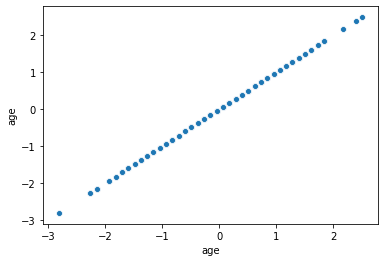

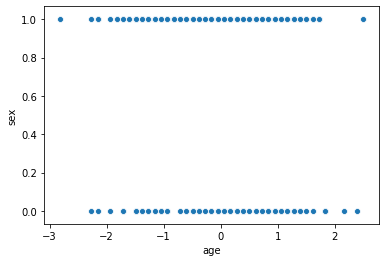

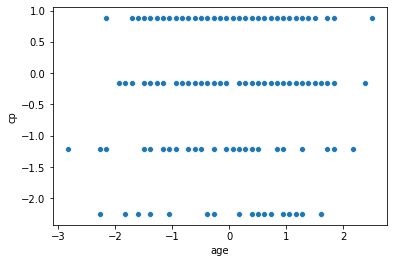

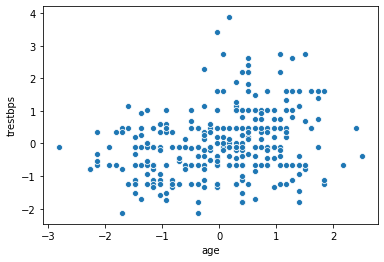

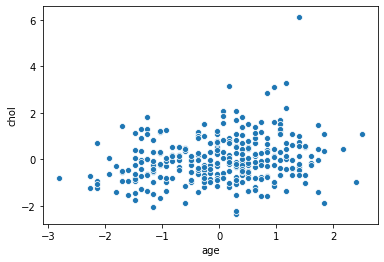

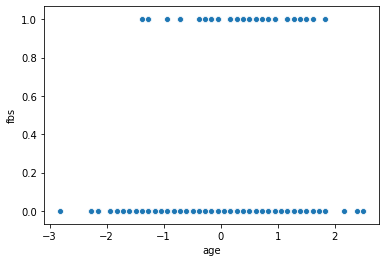

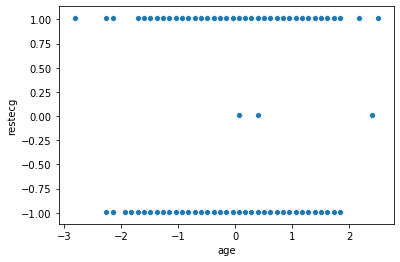

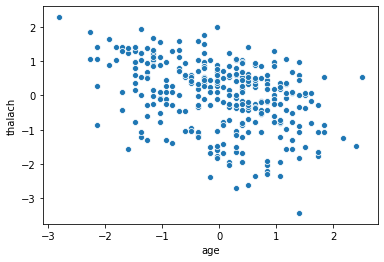

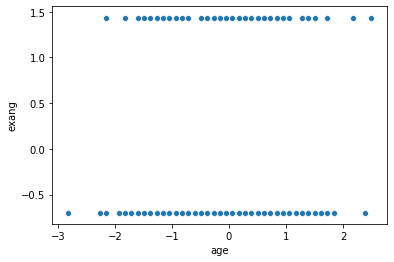

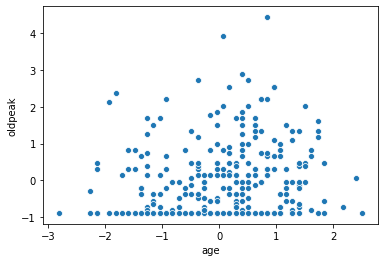

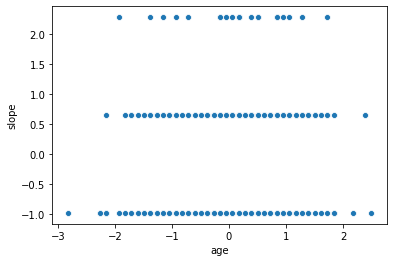

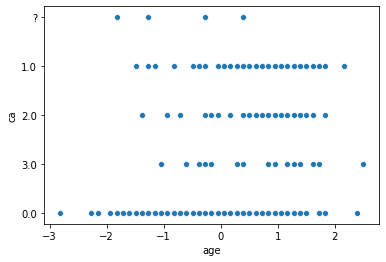

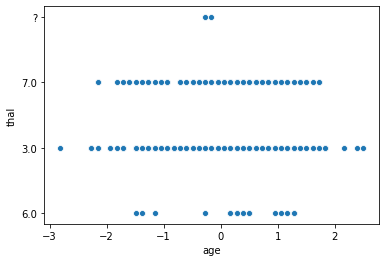

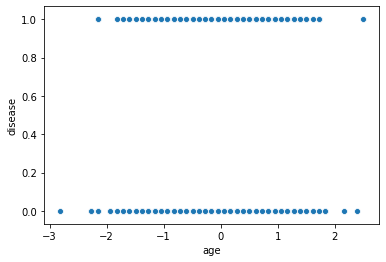

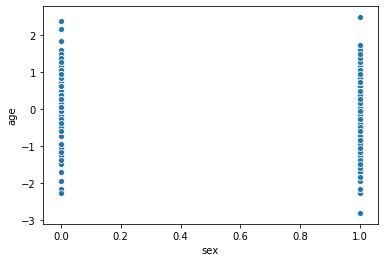

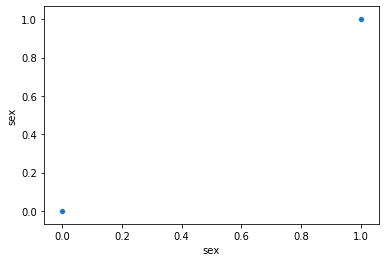

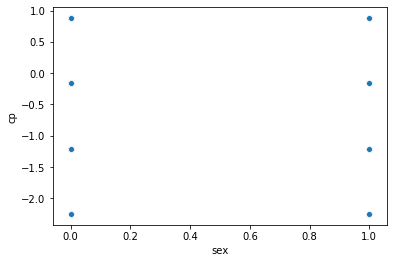

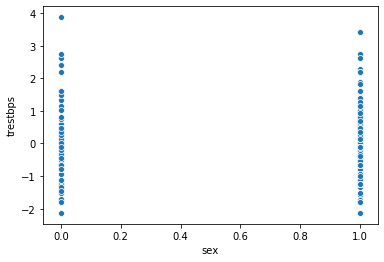

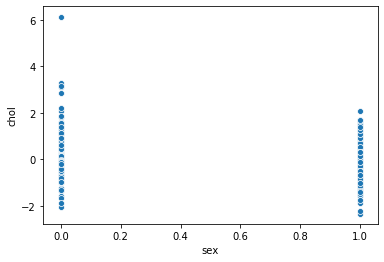

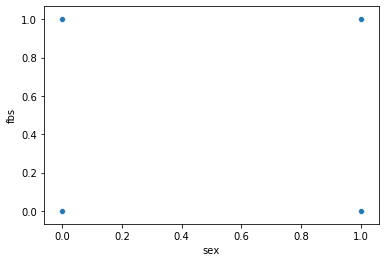

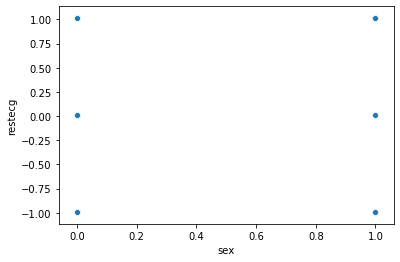

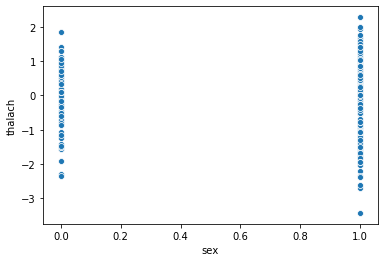

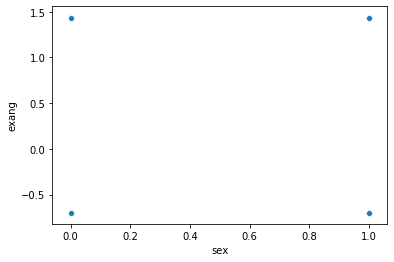

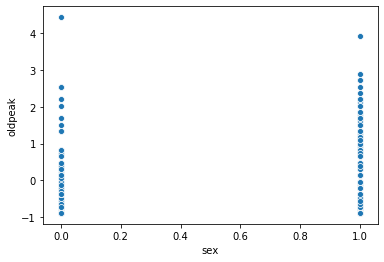

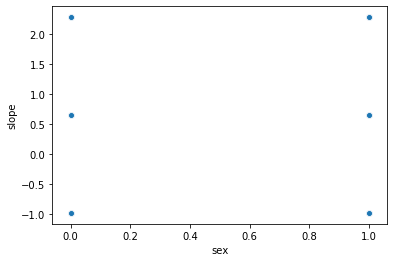

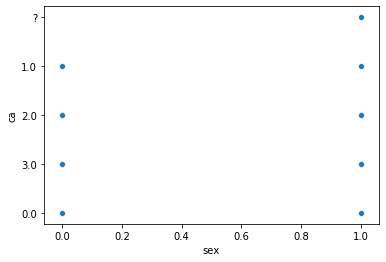

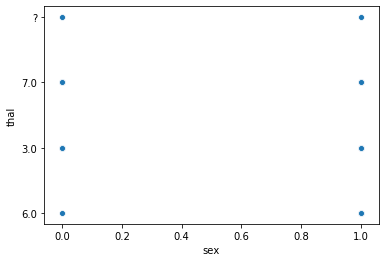

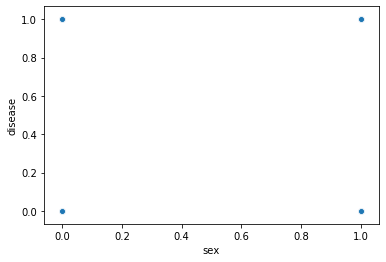

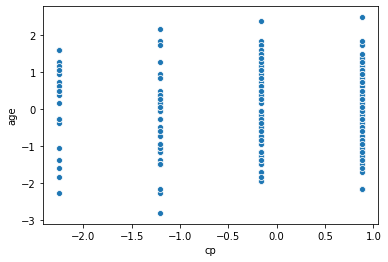

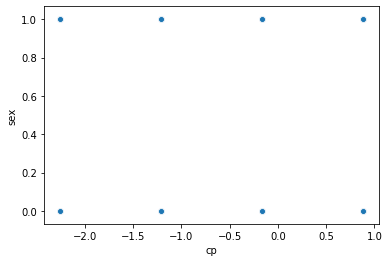

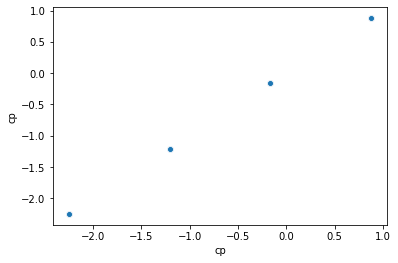

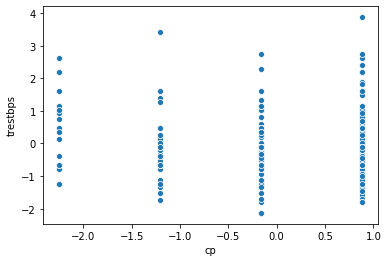

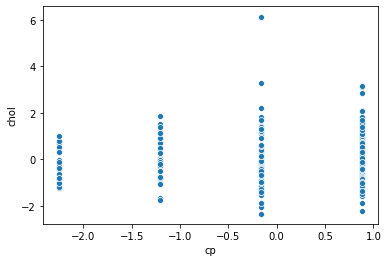

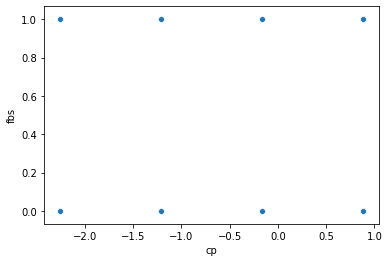

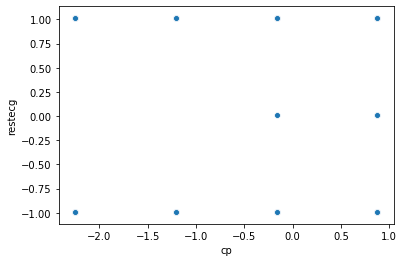

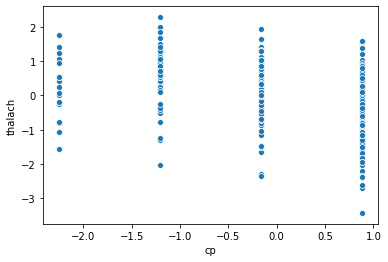

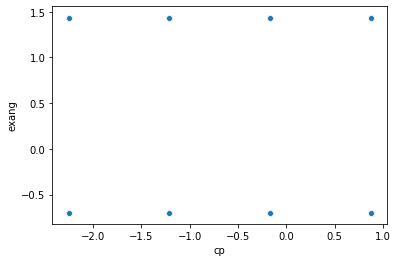

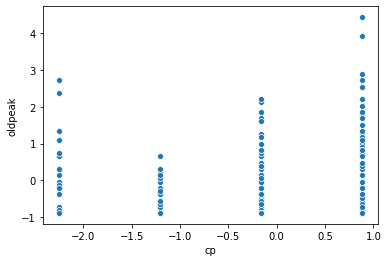

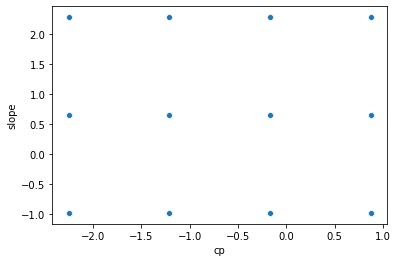

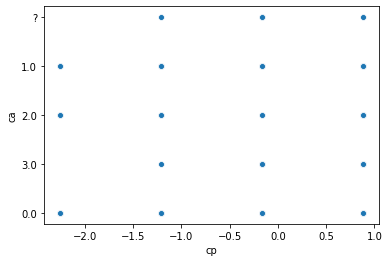

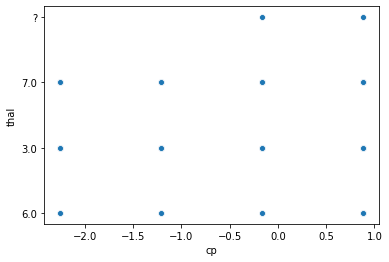

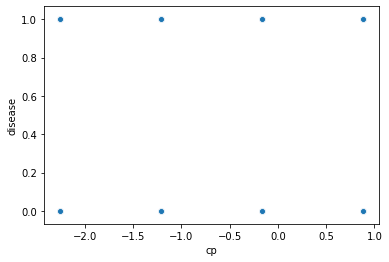

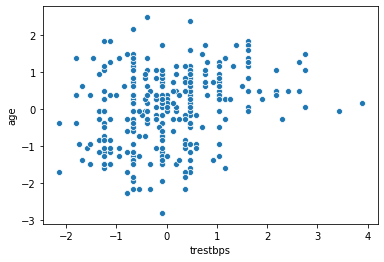

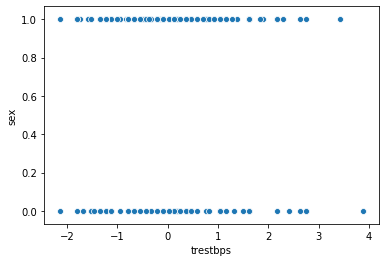

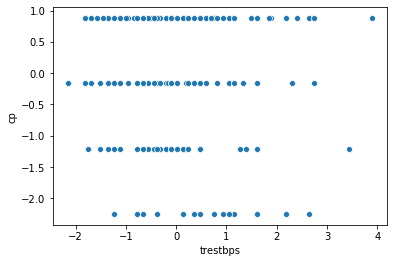

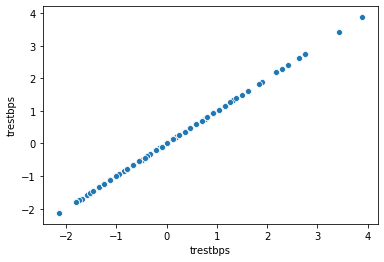

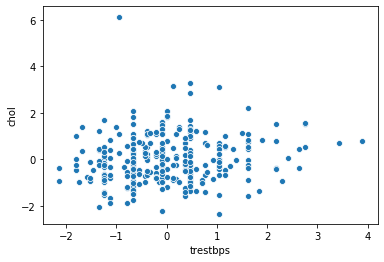

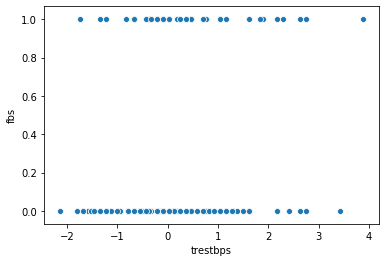

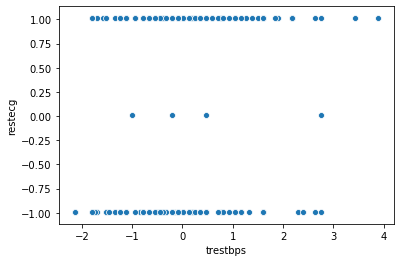

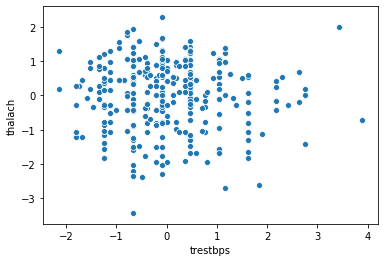

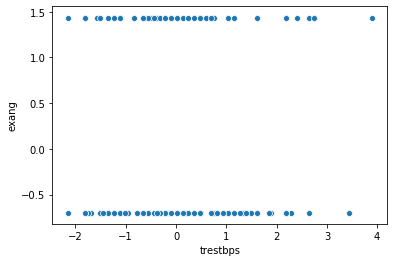

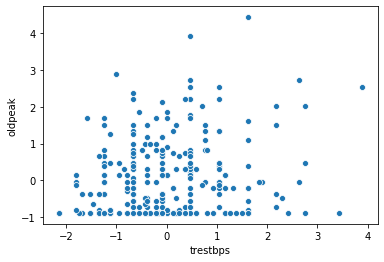

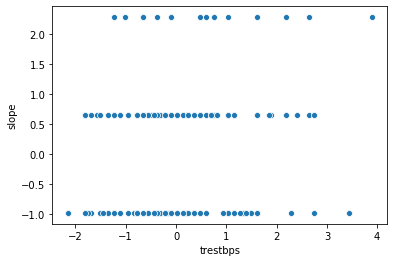

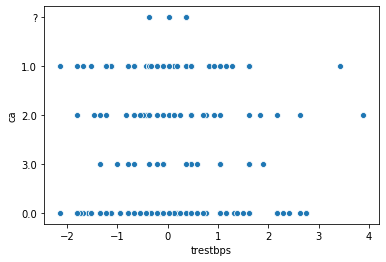

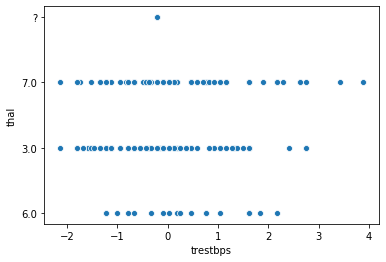

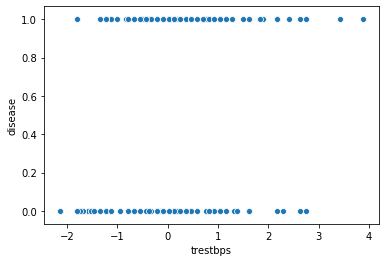

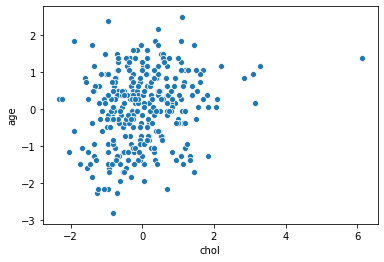

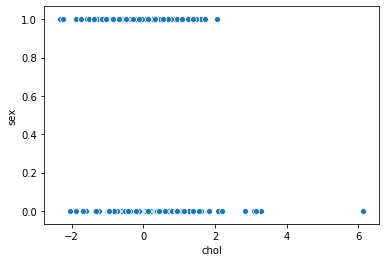

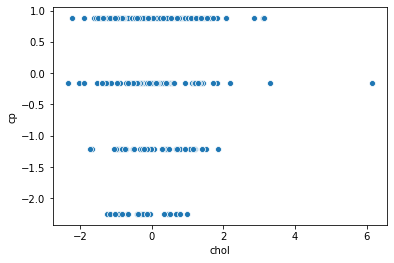

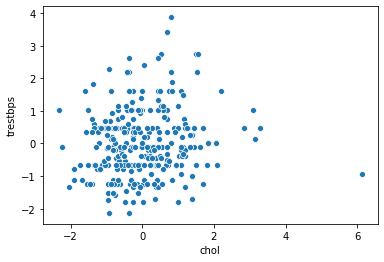

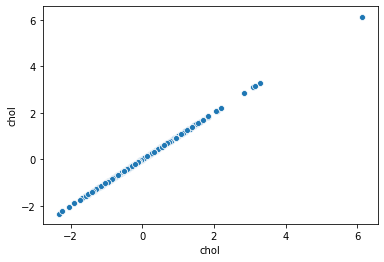

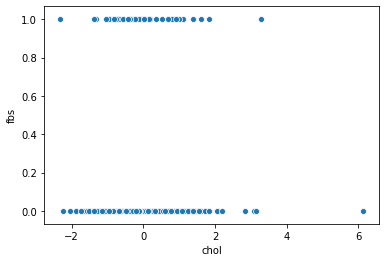

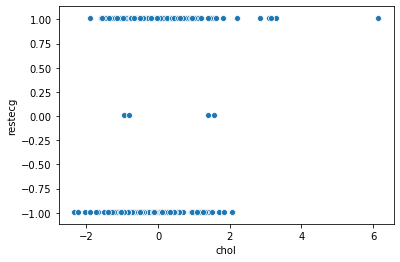

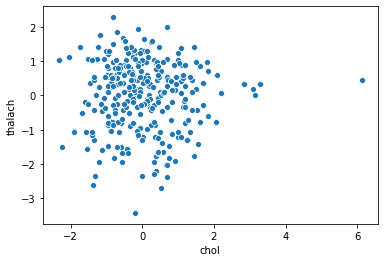

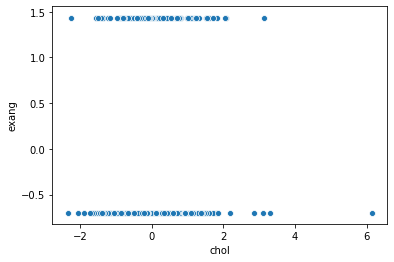

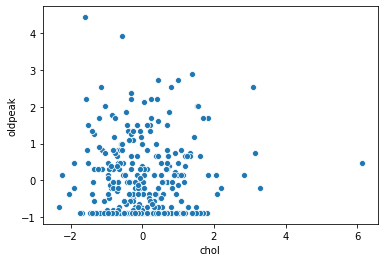

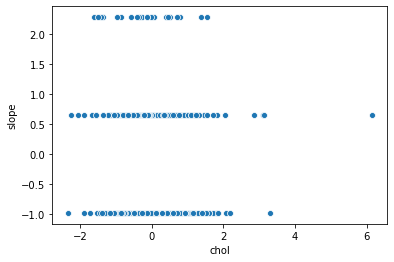

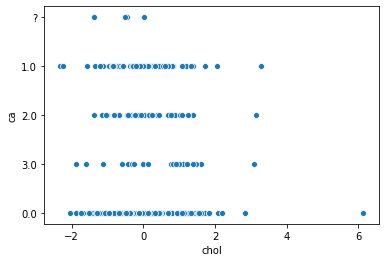

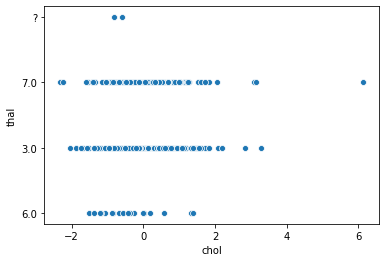

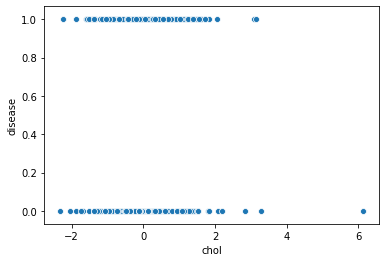

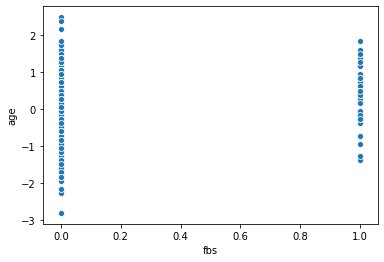

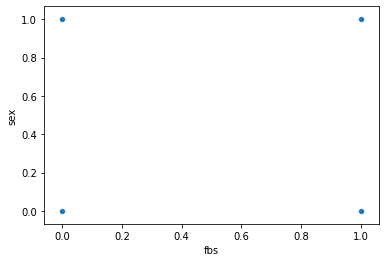

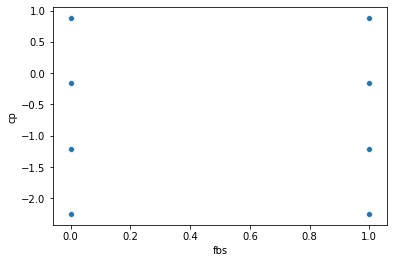

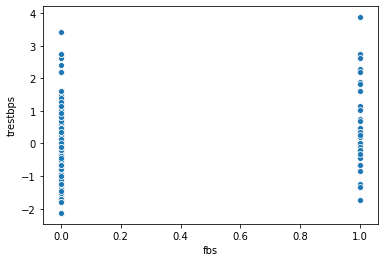

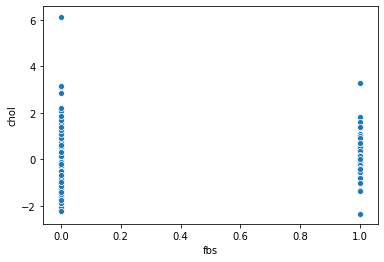

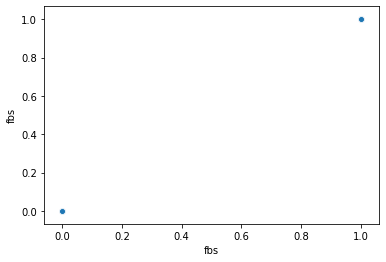

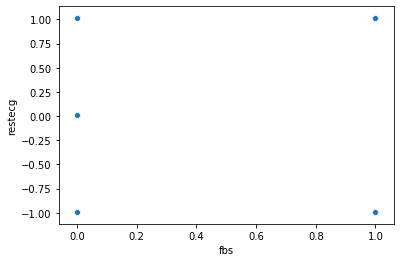

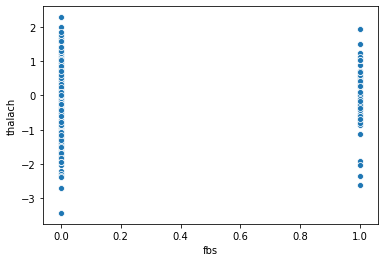

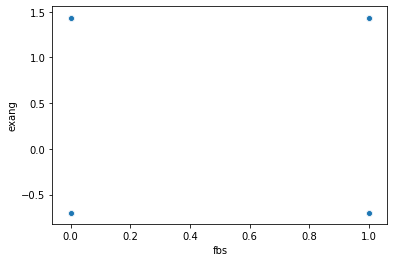

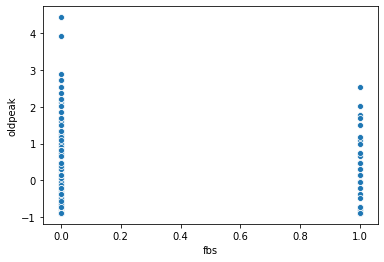

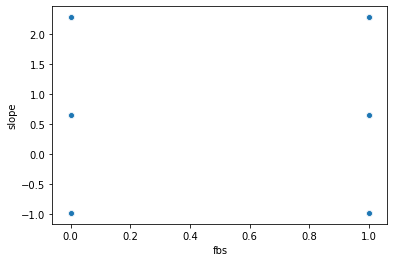

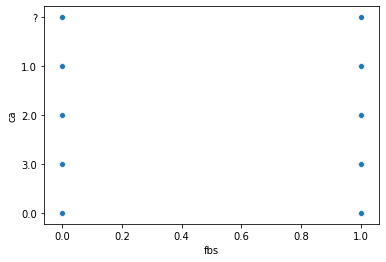

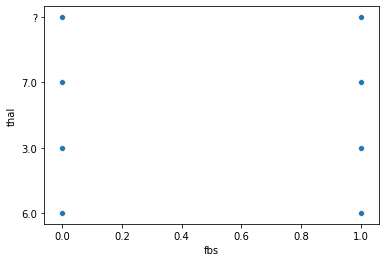

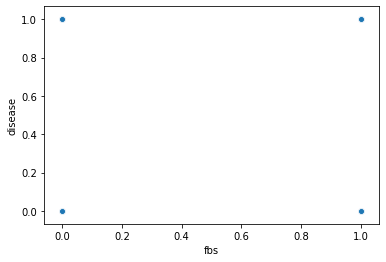

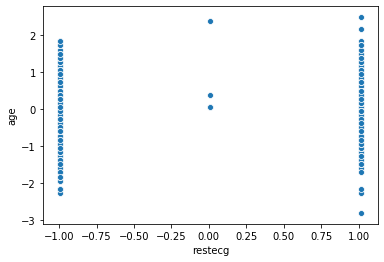

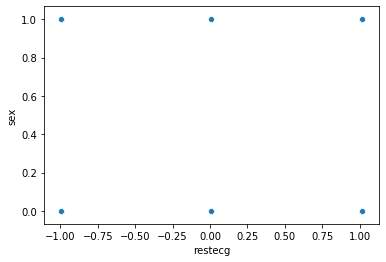

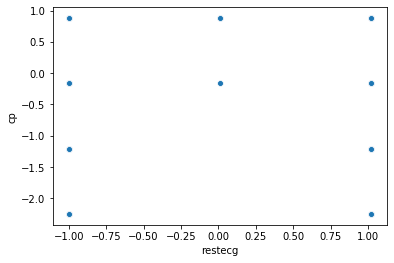

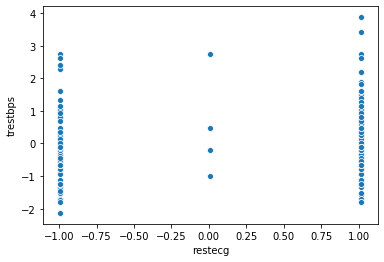

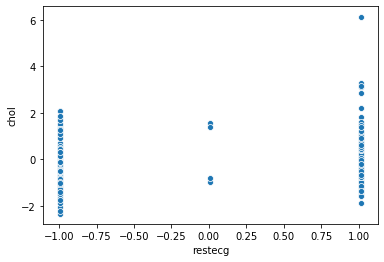

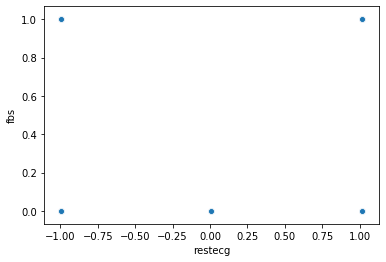

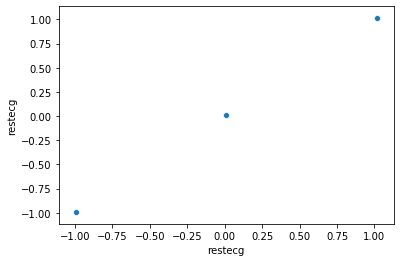

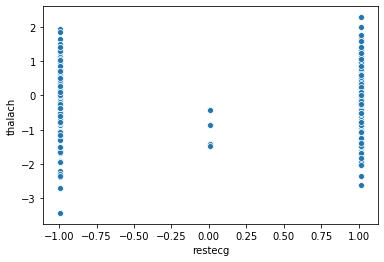

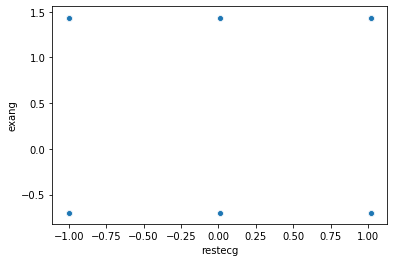

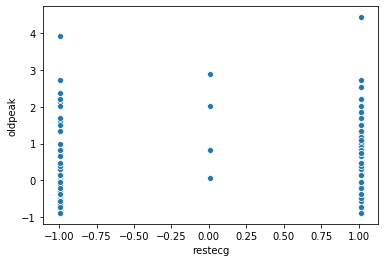

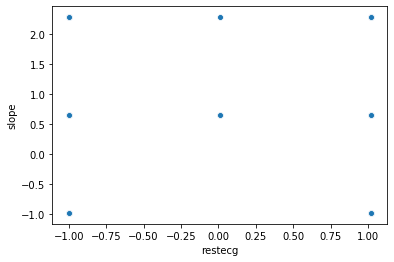

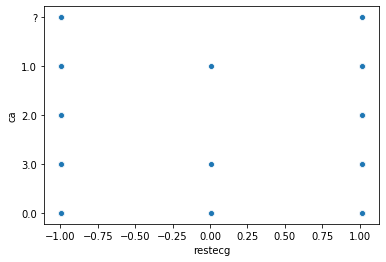

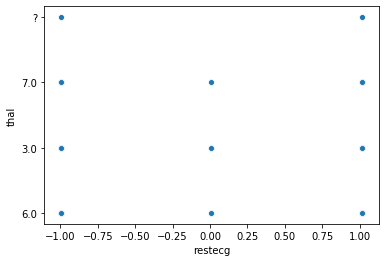

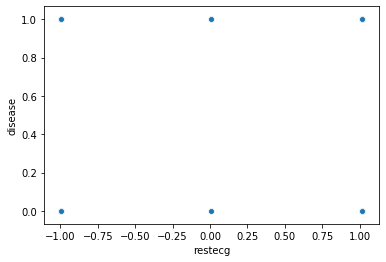

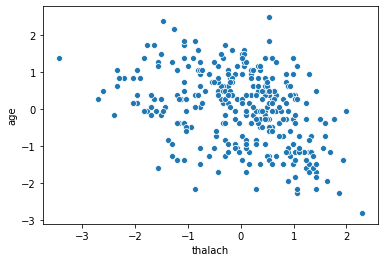

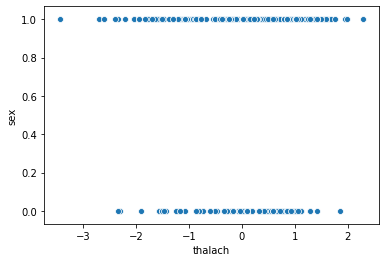

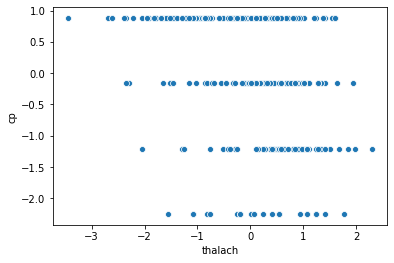

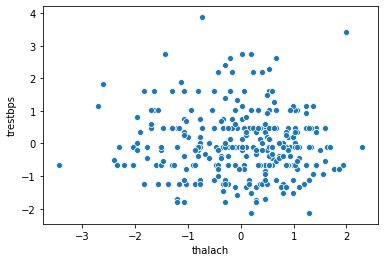

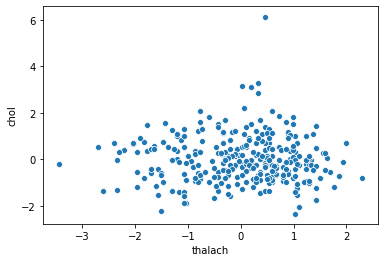

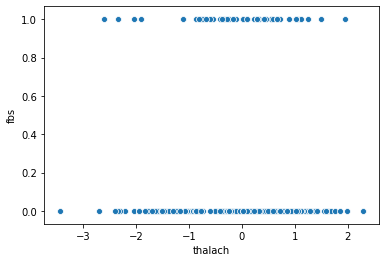

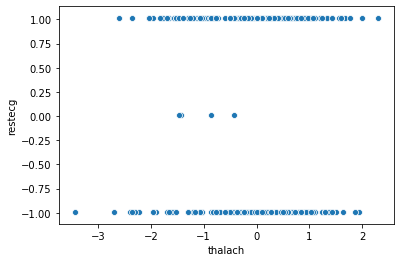

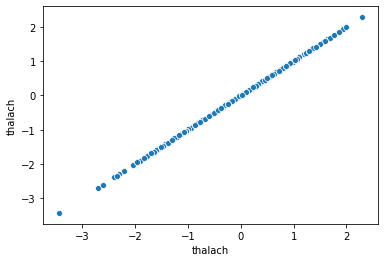

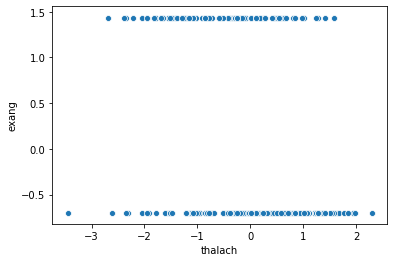

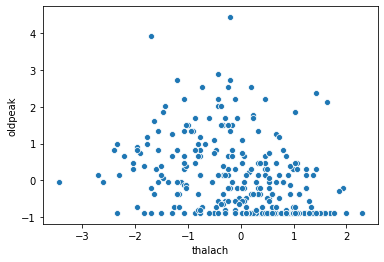

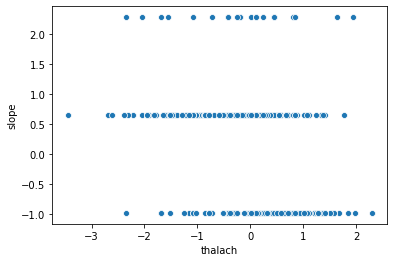

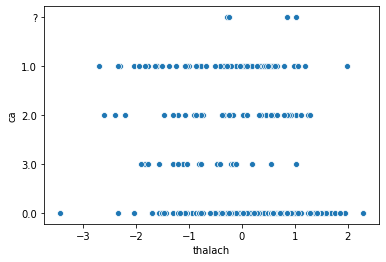

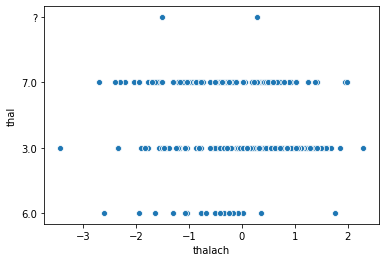

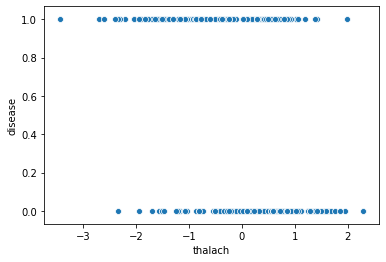

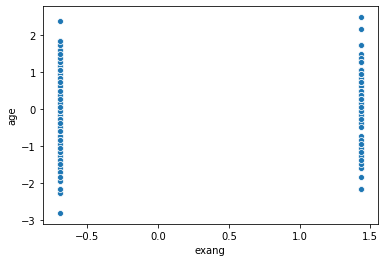

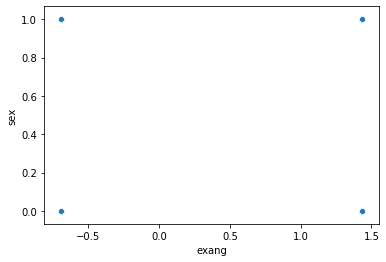

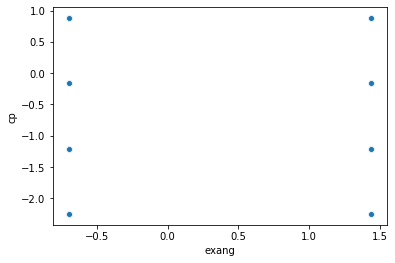

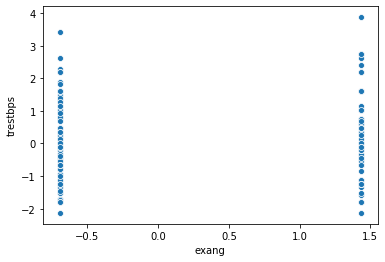

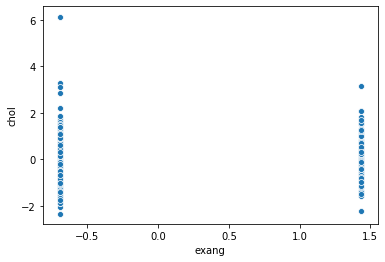

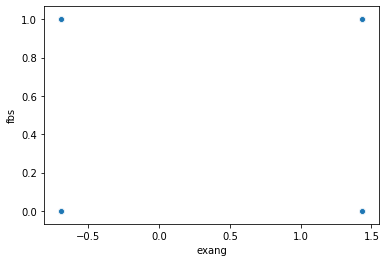

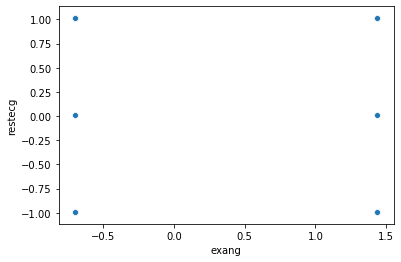

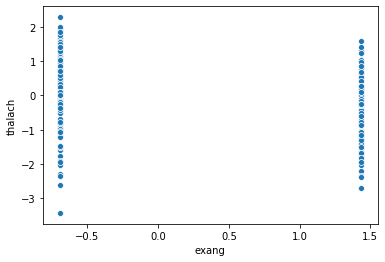

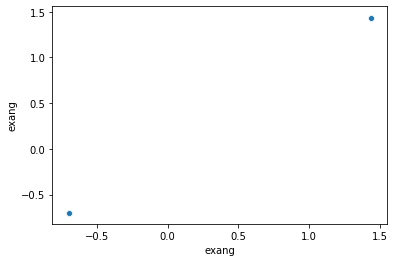

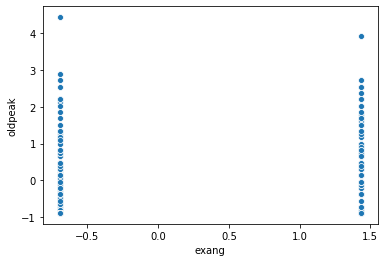

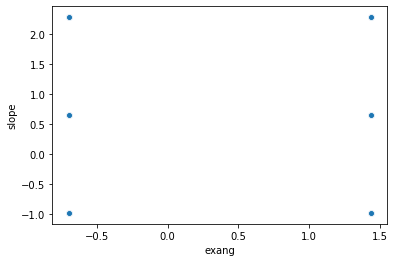

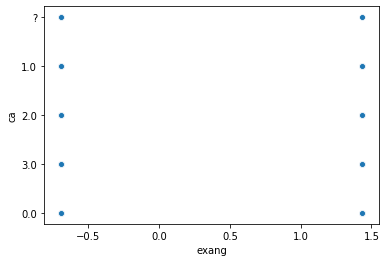

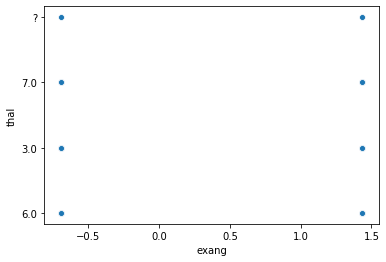

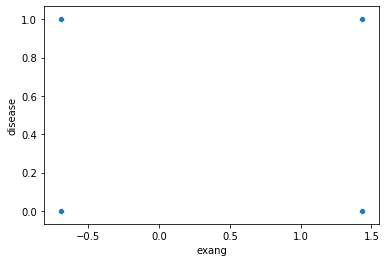

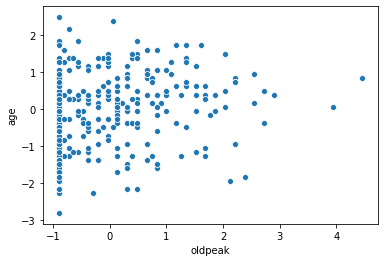

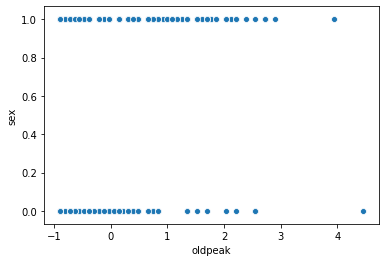

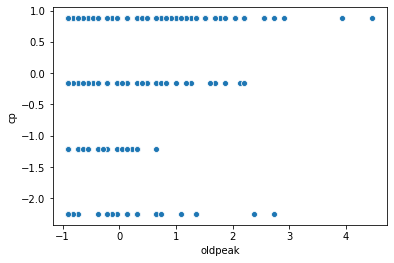

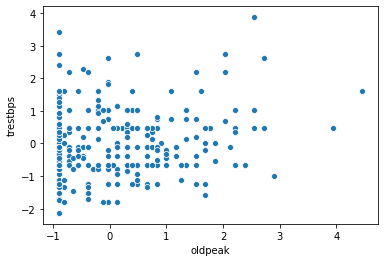

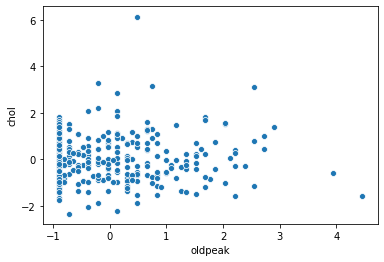

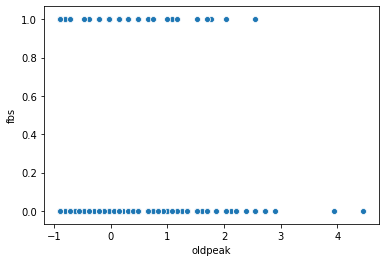

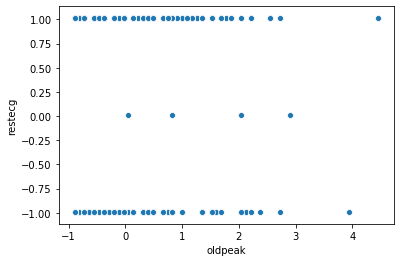

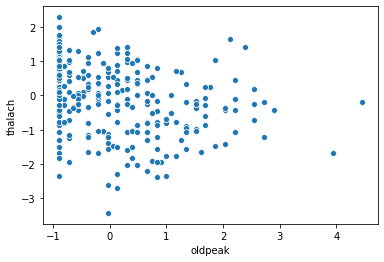

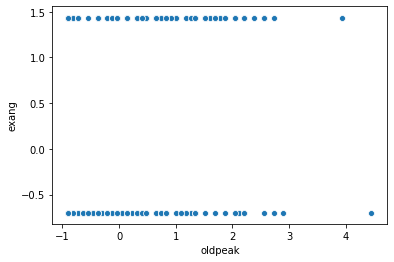

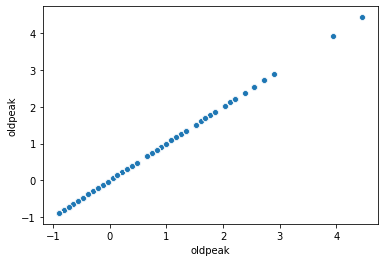

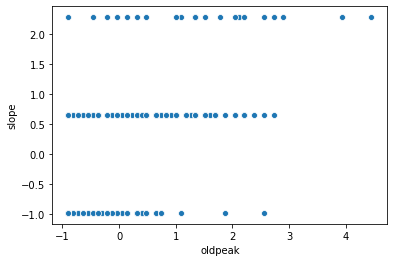

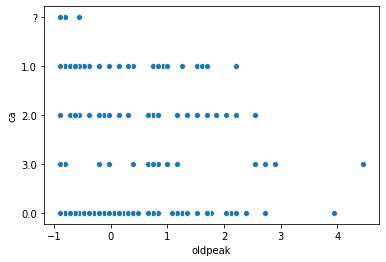

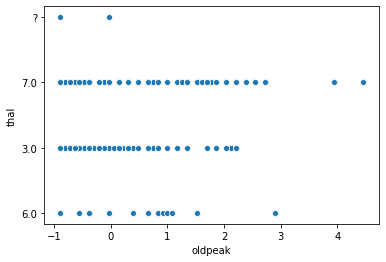

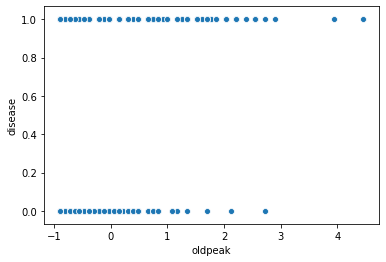

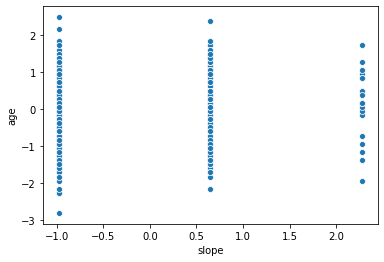

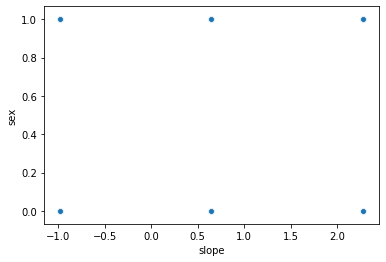

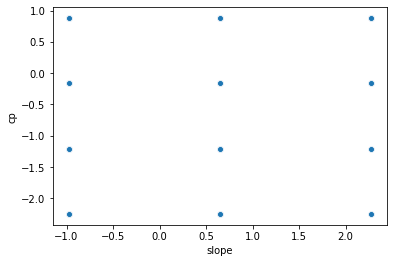

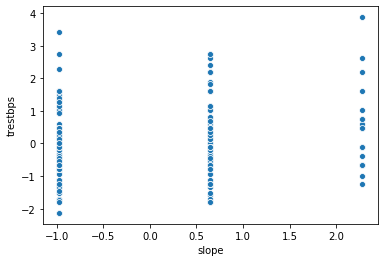

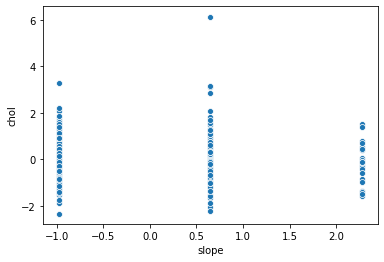

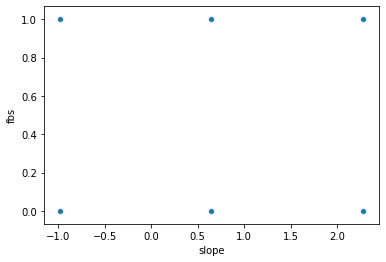

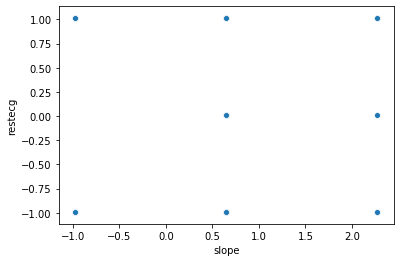

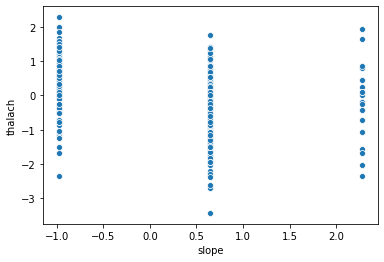

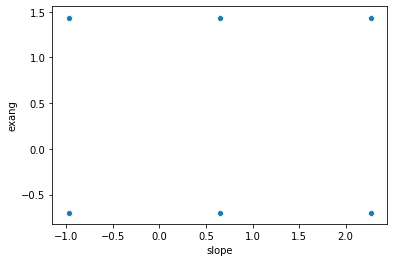

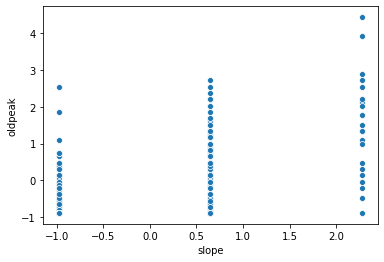

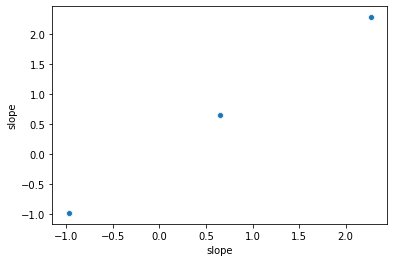

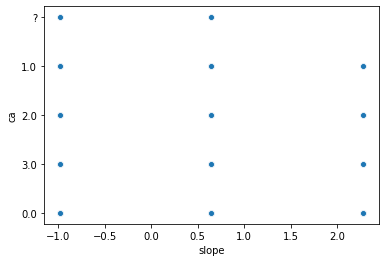

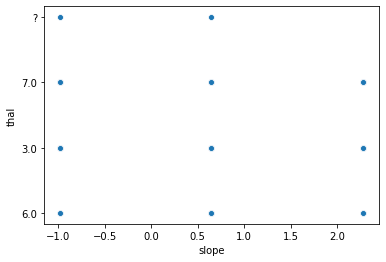

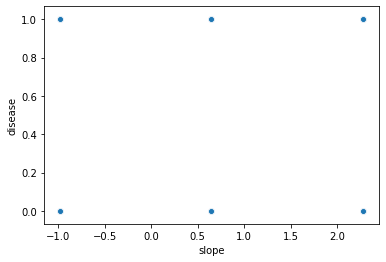

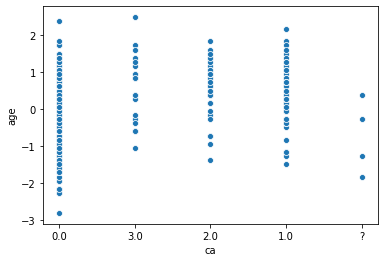

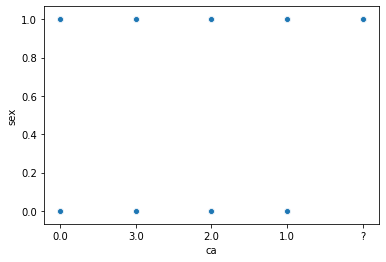

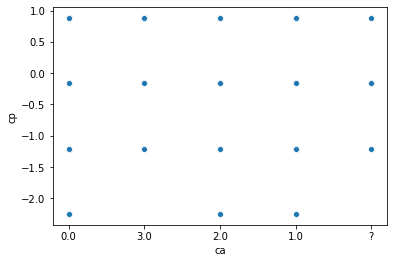

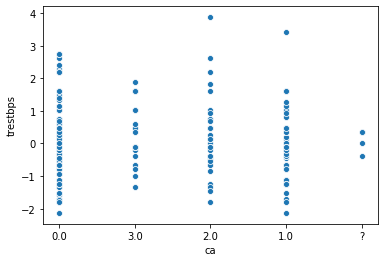

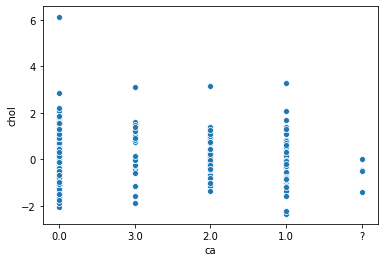

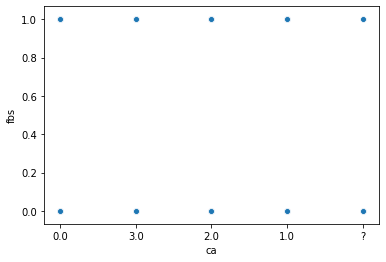

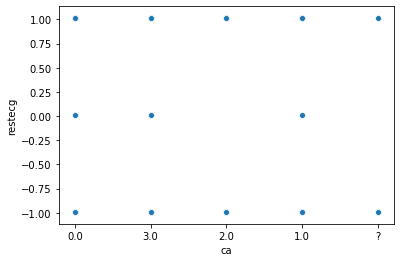

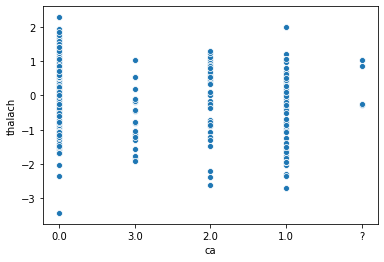

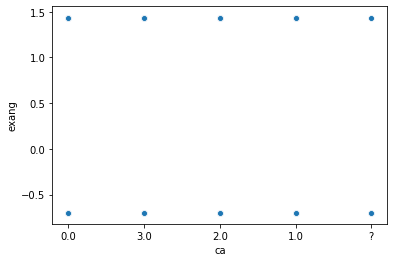

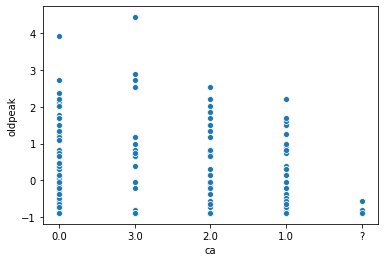

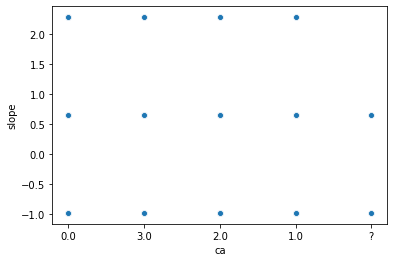

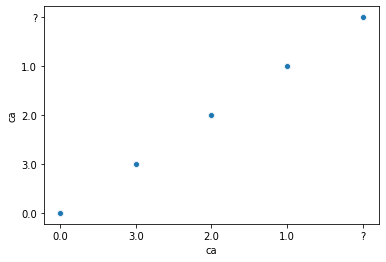

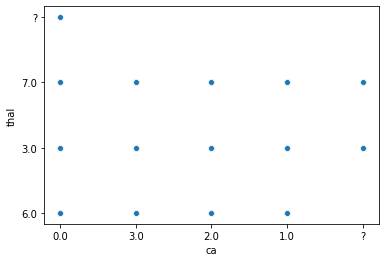

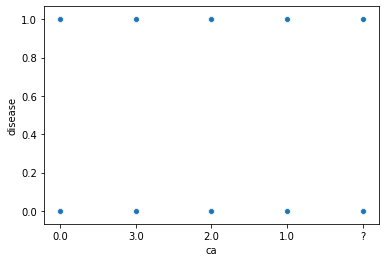

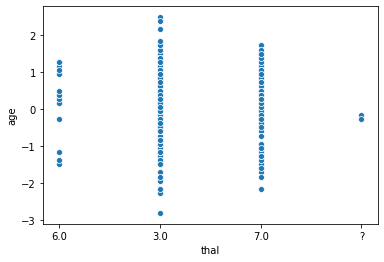

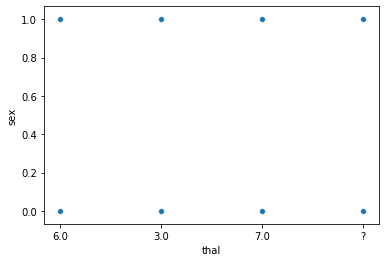

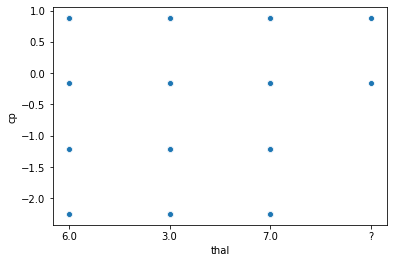

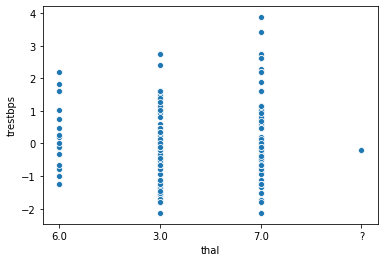

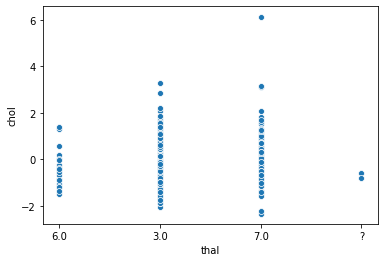

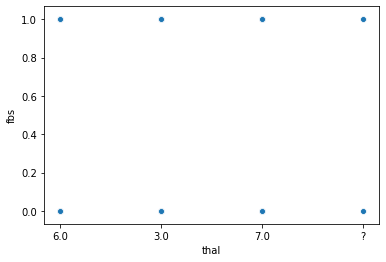

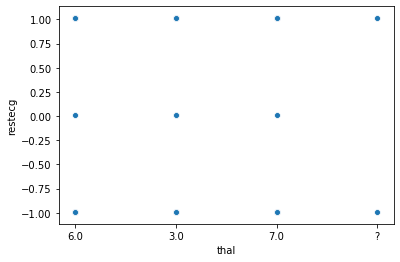

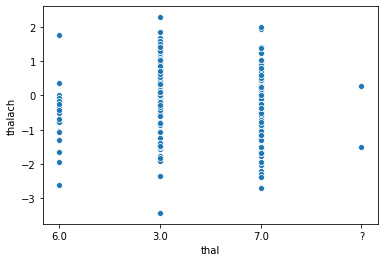

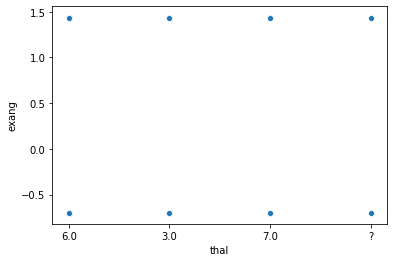

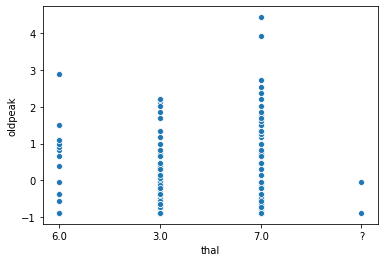

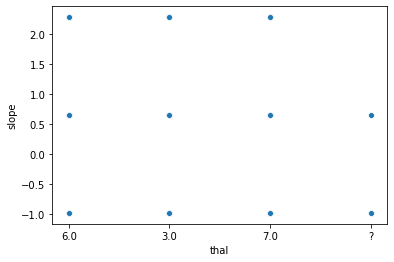

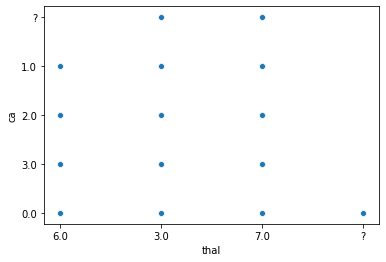

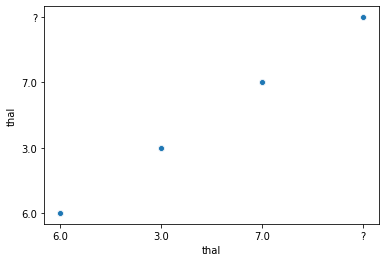

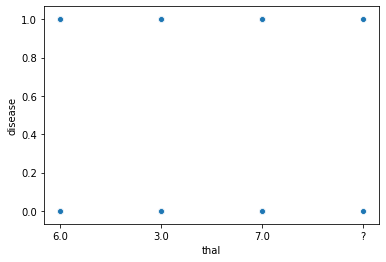

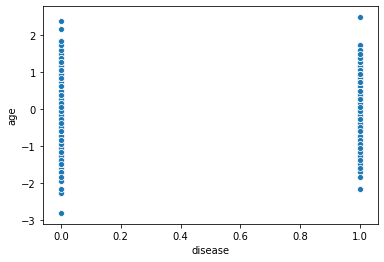

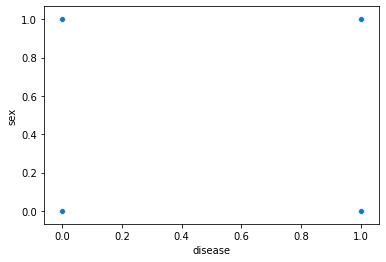

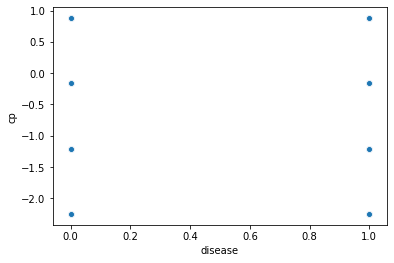

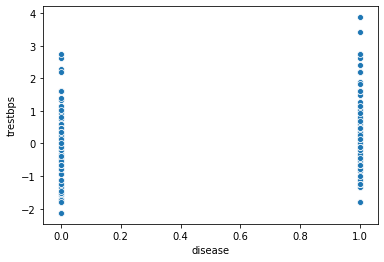

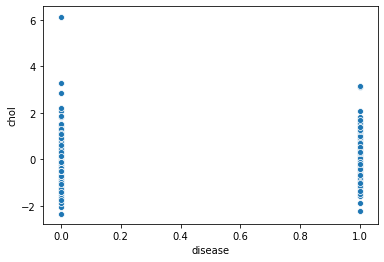

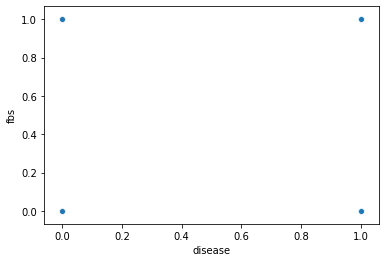

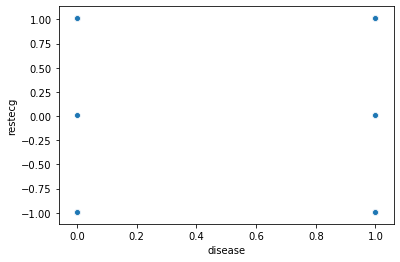

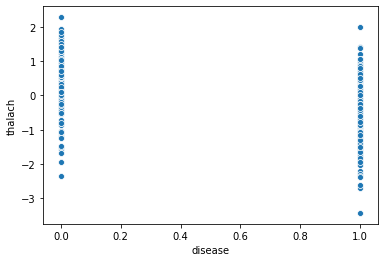

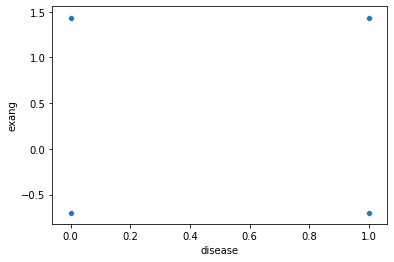

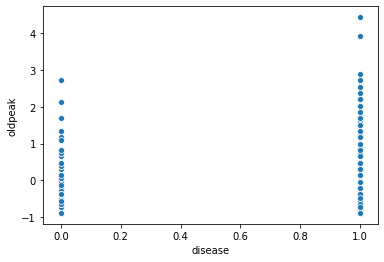

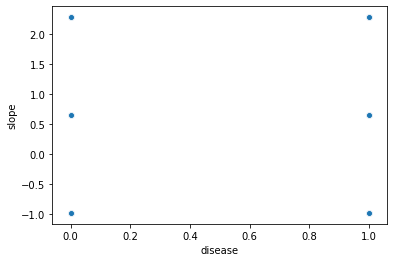

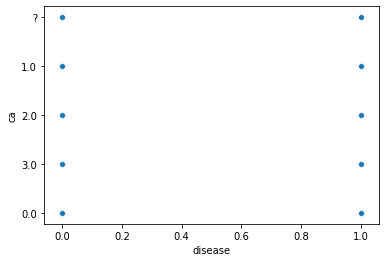

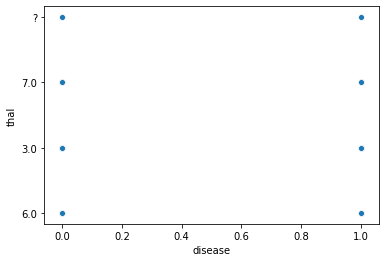

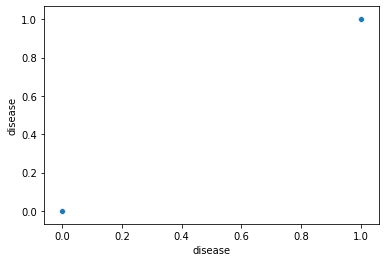

In [74]:
i = 0
for col_0 in df.columns:
    for col_1 in df.columns:
        plt.figure(i)
        i += 1
#         sns.countplot(x=col_1, data=df1)
        sns.scatterplot(x=col_0, y=col_1, data=df)

In [84]:
df.corr(method ='pearson') 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,disease
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.424510


# Curse of dimensionality
"In low-dimensional datasets, the closest points tend to be much closer than average. But two points are close only if they're close in every dimension, and every extra dimension -- even if just noise -- is another opportunity for each point to be further away from every other point. When you have a lot of dimensions it's likely that the closest points aren't much closer than average, which means that two points being close doesn't mean very much (unless there is a *lot* of structure in your data)." -Joel Grus

[0.13031295640403517, 0.2590347638668251, 0.6552572221426587]
[1.474095723571667, 1.3366170233817776, 1.6883186597196476, 0.8869077255255327, 1.453534349508971, 1.5853263000519913, 1.4845001740345751, 1.3117906122392287, 1.3440517027881633, 0.47544561101934296]


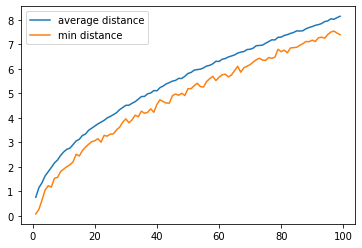

In [18]:
import random
import math

def random_point(dim):
    return [random.random() for _ in range(dim)]

def sq(x):
    return x*x

def distance(a, b):
    a = [sq(a[i]) + sq(b[i]) for i in range(len(a))]
    return math.sqrt(sum(a))

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

print(random_point(3))
print(random_distances(3, 10))

num_pairs = 100
means = []
mins = []
for dim in range(1, 100):
    d = random_distances(dim, num_pairs)
    means.append(sum(d)/len(d))
    mins.append(min(d))

# Note that the ratio of average distance to min distance
# approaches one, so there's less space between the two.
plt.plot(range(1, 100), means, label='average distance')
plt.plot(range(1, 100), mins, label='min distance')
plt.legend()